In [5]:
# packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


## Data Processing

In [6]:
data = pd.read_csv("/Users/irisyu/desktop/project/machine-learning/nurse-stress-sensor.csv")
data.info()

/var/folders/cg/skgvx5ds71j6114m1yy9bc5r0000gn/T/ipykernel_94204/358519631.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/irisyu/desktop/project/machine-learning/nurse-stress-sensor.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [7]:
data.shape

(11509051, 9)

In [8]:
data.head(5)

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


Dataset Nine Columns Description

X, Y, Z:
Description: Numerical values representing orientation data.
Unique Entries: Each column has 256 unique values.

EDA (Electrodermal Activity):
Description: Continuous numerical values measuring electrodermal activity.
Unique Entries: Contains 274,452 unique numerical values.

HR (Heart Rate):
Description: Continuous numerical values representing heart rate measurements.
Unique Entries: Comprises 6,268 distinct numerical values.

TEMP (Temperature):
Description: Continuous numerical values denoting temperature readings.
Unique Entries: Contains 599 unique numerical values.

id:
Description: Categorical data serving as identifiers for specific subjects or entities.
Unique Entries: Consists of 18 distinct categorical entries.



In [9]:
data.isna().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

In [10]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

Q1 = data['EDA'].quantile(0.25)
Q3 = data['EDA'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

EDAoutliers_iqr = data[(data['EDA'] < lower_bound) | (data['EDA'] > upper_bound)]
print(EDAoutliers_iqr)


eda_median = data['EDA'].median()

data.loc[(data['EDA'] < lower_bound) | (data['EDA'] > upper_bound), 'EDA'] = eda_median

             X     Y     Z       EDA      HR   TEMP  id  \
242287   -44.0  21.0 -41.0  9.859818  104.97  31.87  15   
242288   -47.0  17.0 -40.0  9.859818  104.97  31.87  15   
242289   -47.0  20.0 -41.0  9.859818  104.97  31.87  15   
242290   -47.0  20.0 -44.0  9.859818  104.97  31.87  15   
242291   -47.0  19.0 -42.0  9.859818  104.97  31.87  15   
...        ...   ...   ...       ...     ...    ...  ..   
11499557 -70.0  11.0 -39.0  9.875213   92.52  34.23  F5   
11499558 -85.0   8.0 -26.0  9.875213   92.52  34.23  F5   
11499559 -62.0  12.0  -4.0  9.875213   92.52  34.23  F5   
11499560 -55.0  12.0  -2.0  9.875213   92.52  34.23  F5   
11499561 -57.0  13.0  -8.0  9.875213   92.52  34.23  F5   

                               datetime  label  
242287    2020-07-24 13:12:11.249999872    2.0  
242288    2020-07-24 13:12:11.281250048    2.0  
242289    2020-07-24 13:12:11.312499968    2.0  
242290    2020-07-24 13:12:11.343749888    2.0  
242291    2020-07-24 13:12:11.375000064    2.0

In [11]:
data['Z_Score'] = zscore(data['EDA'])

EDAoutliers_zscore = data[data['Z_Score'].abs() > 3]
print(EDAoutliers_zscore)

data.loc[data['Z_Score'].abs() > 3, 'EDA'] = eda_median


data.drop(columns=['Z_Score'], inplace=True)


             X     Y     Z       EDA     HR   TEMP  id  \
240007   -59.0   3.0  -6.0  8.859779  94.45  31.91  15   
240008   -61.0   2.0 -11.0  8.859779  94.45  31.91  15   
240009   -60.0   1.0 -14.0  8.859779  94.45  31.91  15   
240010   -60.0   1.0 -17.0  8.859779  94.45  31.91  15   
240011   -56.0  -1.0 -26.0  8.859779  94.45  31.91  15   
...        ...   ...   ...       ...    ...    ...  ..   
11500989 -27.0  46.0 -22.0  8.725327  91.77  34.27  F5   
11500990 -18.0  47.0 -32.0  8.725327  91.77  34.27  F5   
11500991 -15.0  48.0 -34.0  8.725327  91.77  34.27  F5   
11500992 -15.0  47.0 -36.0  8.725327  91.77  34.27  F5   
11500993 -23.0  48.0 -36.0  8.725327  91.77  34.27  F5   

                               datetime  label   Z_Score  
240007    2020-07-24 13:11:00.000000000    2.0  3.080557  
240008    2020-07-24 13:11:00.031249920    2.0  3.080557  
240009    2020-07-24 13:11:00.062500096    2.0  3.080557  
240010    2020-07-24 13:11:00.093750016    2.0  3.080557  
240011  

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.drop(["id"], axis=1, inplace=True)

In [14]:
data['year']=data['datetime'].dt.year
data['month']=data['datetime'].dt.month
data['day']=data['datetime'].dt.day
data['hour']=data['datetime'].dt.hour
data['minute']=data['datetime'].dt.minute
data['second']=data['datetime'].dt.second

In [15]:
data.duplicated().sum()

0

## Exploratory Data Analysis

In [16]:
data.describe().round(2)

,X,Y,Z,EDA,HR,TEMP,datetime,label,year,month,day,hour,minute,second
count,11403445.00,11403445.00,11403445.00,11403445.00,11403445.00,11403445.00,11403445,11403445.00,11403445.0,11403445.00,11403445.00,11403445.00,11403445.00,11403445.00
mean,-28.29,-1.10,23.94,1.64,85.76,32.25,2020-08-01 05:45:33.503475200,1.55,2020.0,7.52,15.43,15.08,29.34,29.50
min,-128.00,-128.00,-128.00,0.00,51.00,24.09,2020-04-14 22:31:00,0.00,2020.0,4.00,1.00,0.00,0.00,0.00
25%,-52.00,-19.00,4.00,0.22,76.68,30.21,2020-06-25 20:40:51.875000064,1.00,2020.0,6.00,6.00,14.00,14.00,15.00
50%,-33.00,1.00,26.00,1.14,83.90,32.59,2020-07-06 16:24:06.812499968,2.00,2020.0,7.00,16.00,16.00,29.00,30.00
75%,-14.00,17.00,49.00,2.34,93.13,34.27,2020-08-06 20:53:12,2.00,2020.0,8.00,23.00,18.00,44.00,45.00
max,127.00,127.00,127.00,8.68,180.23,36.59,2020-12-13 08:01:00,2.00,2020.0,12.00,31.00,23.00,59.00,59.00
std,31.41,33.29,29.87,1.95,14.23,2.26,NaN,0.79,0.0,2.37,9.30,4.61,17.60,17.32


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


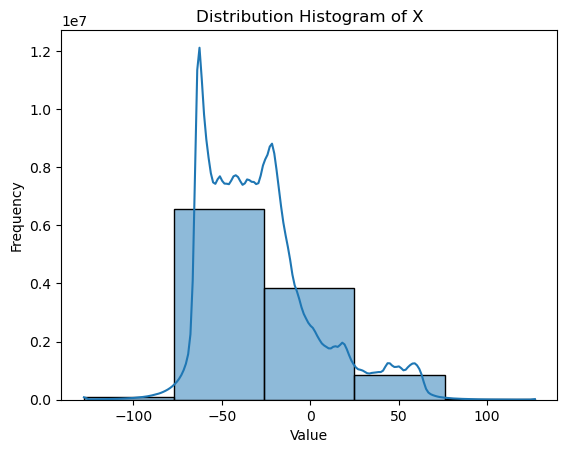

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


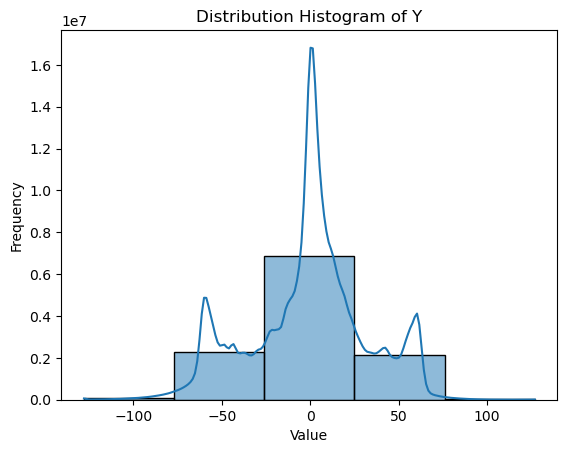

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


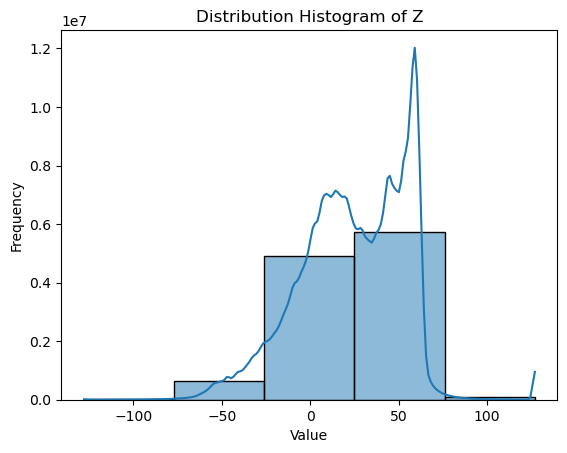

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


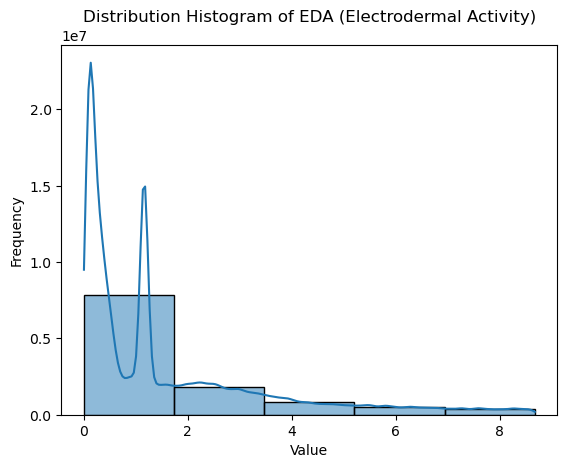

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


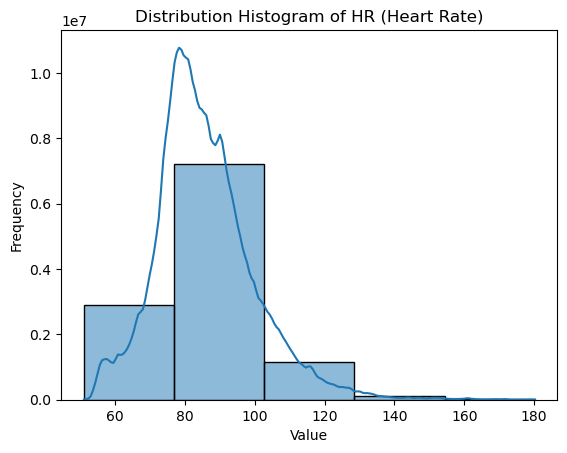

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


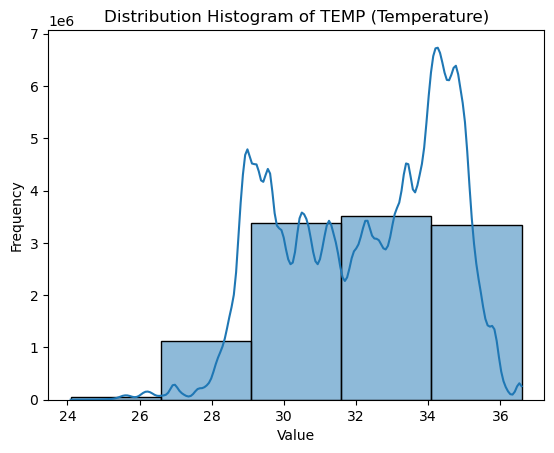

In [17]:
class FrequencyVisualizer:
    def __init__(self, data):
        self.data = data

    def plot_histogram(self, column_name, title):
        sns.histplot(self.data[column_name], bins=5,kde=True)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(title)
        plt.show()

    def plot_all_histograms(self):
        columns = [
            ("X", "Distribution Histogram of X"),
            ("Y", "Distribution Histogram of Y"),
            ("Z", "Distribution Histogram of Z"),
            ("EDA", "Distribution Histogram of EDA (Electrodermal Activity)"),
            ("HR", "Distribution Histogram of HR (Heart Rate)"),
            ("TEMP", "Distribution Histogram of TEMP (Temperature)")
        ]

        for column, title in columns:
            self.plot_histogram(column, title)

visualizer = FrequencyVisualizer(data)

visualizer.plot_all_histograms()


In [18]:
#Categorical Variable Analysis
data['label'].value_counts()

label
2.0    8467619
0.0    2162245
1.0     773581
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

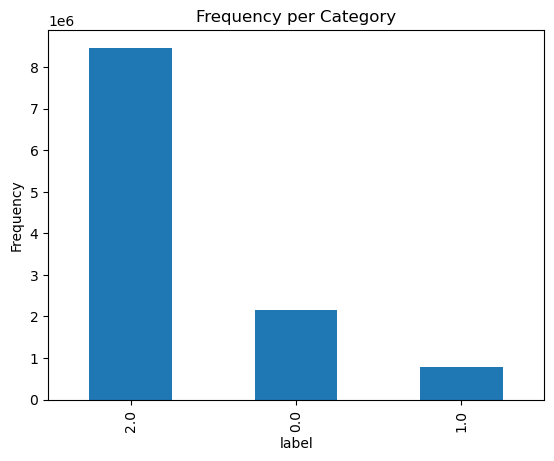

In [19]:
data['label'].value_counts().plot(kind='bar')
plt.title('Frequency per Category')
plt.ylabel('Frequency')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


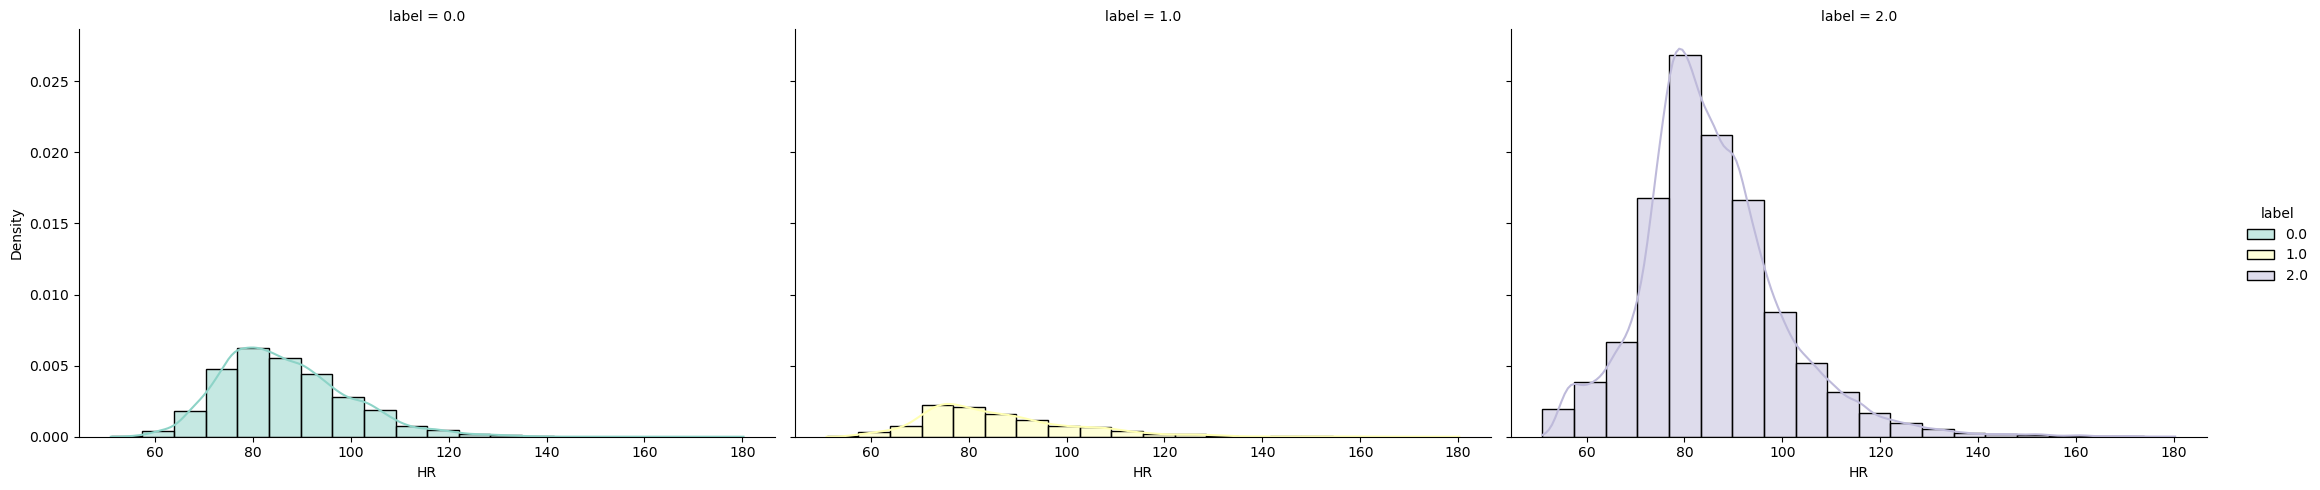

In [20]:
sns.displot(data = data, x = "HR", hue = "label", bins = 20, palette = "Set3", col = "label",
            kde_kws = {"bw_adjust": 2.5}, stat = "density", kde = True, aspect = 1.5)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



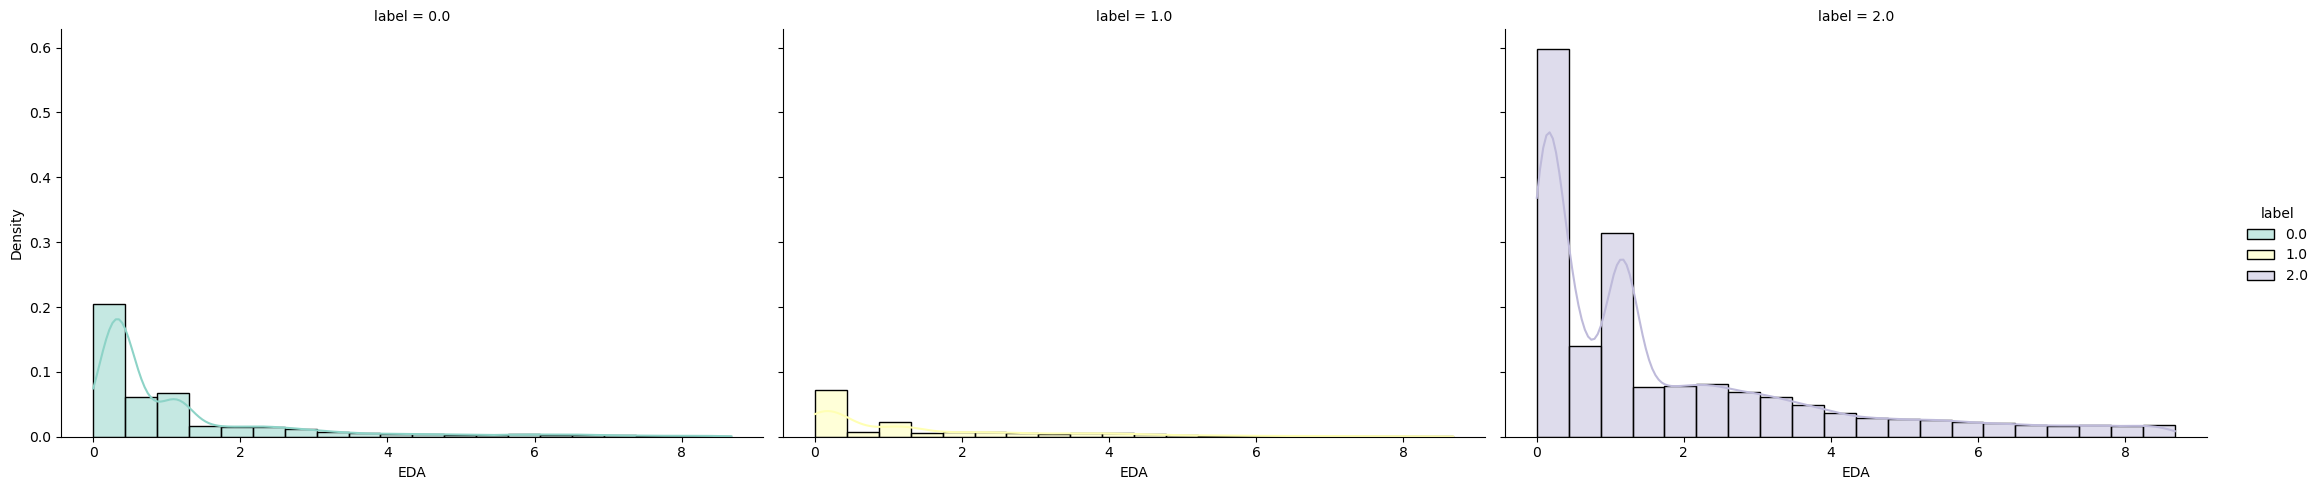

In [26]:
sns.displot(data = data, x = "EDA", hue = "label", bins = 20, palette = "Set3", col = "label",
            kde_kws = {"bw_adjust": 2.5}, stat = "density", kde = True, aspect = 1.5)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



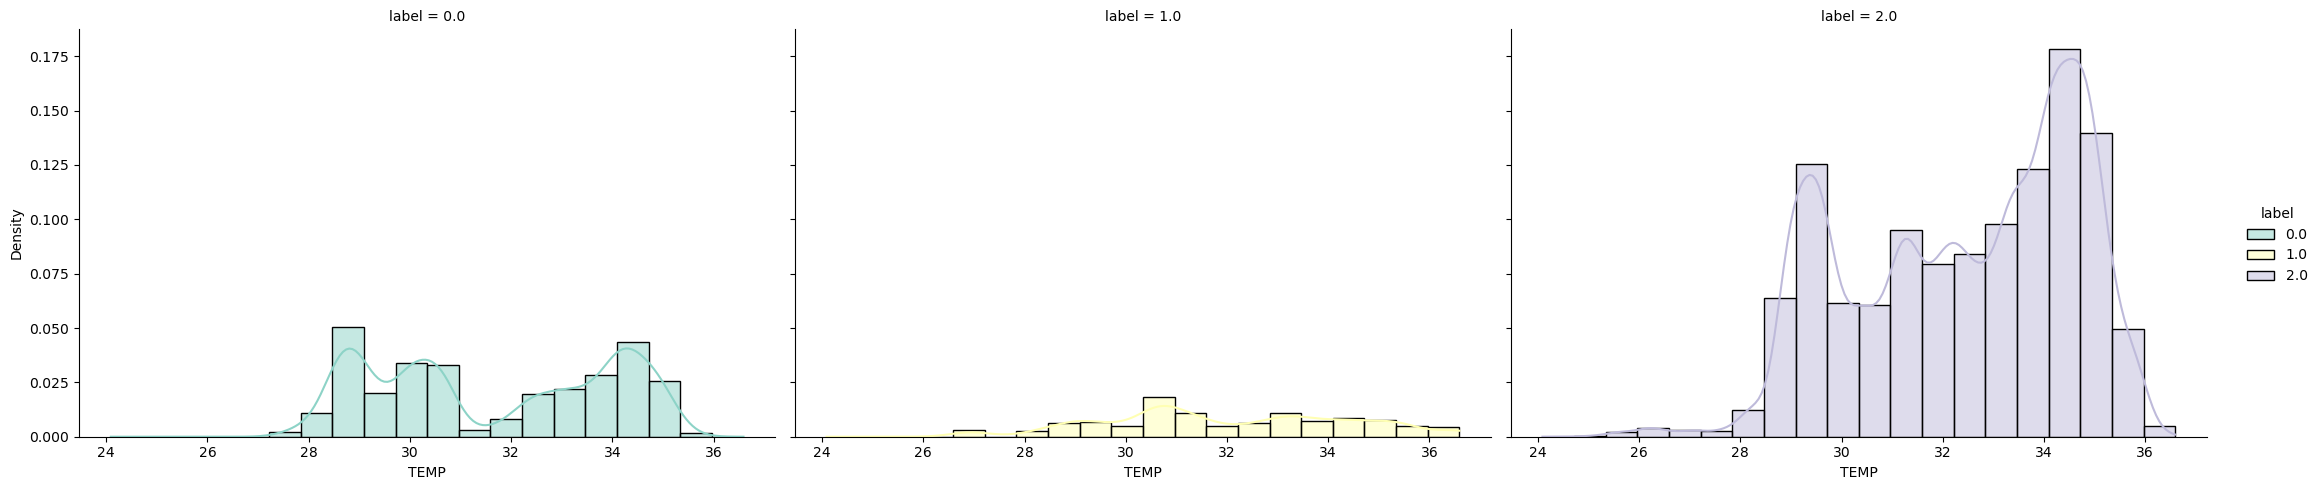

In [27]:
sns.displot(data = data, x = "TEMP", hue = "label", bins = 20, palette = "Set3", col = "label",
            kde_kws = {"bw_adjust": 2.5}, stat = "density", kde = True, aspect = 1.5)

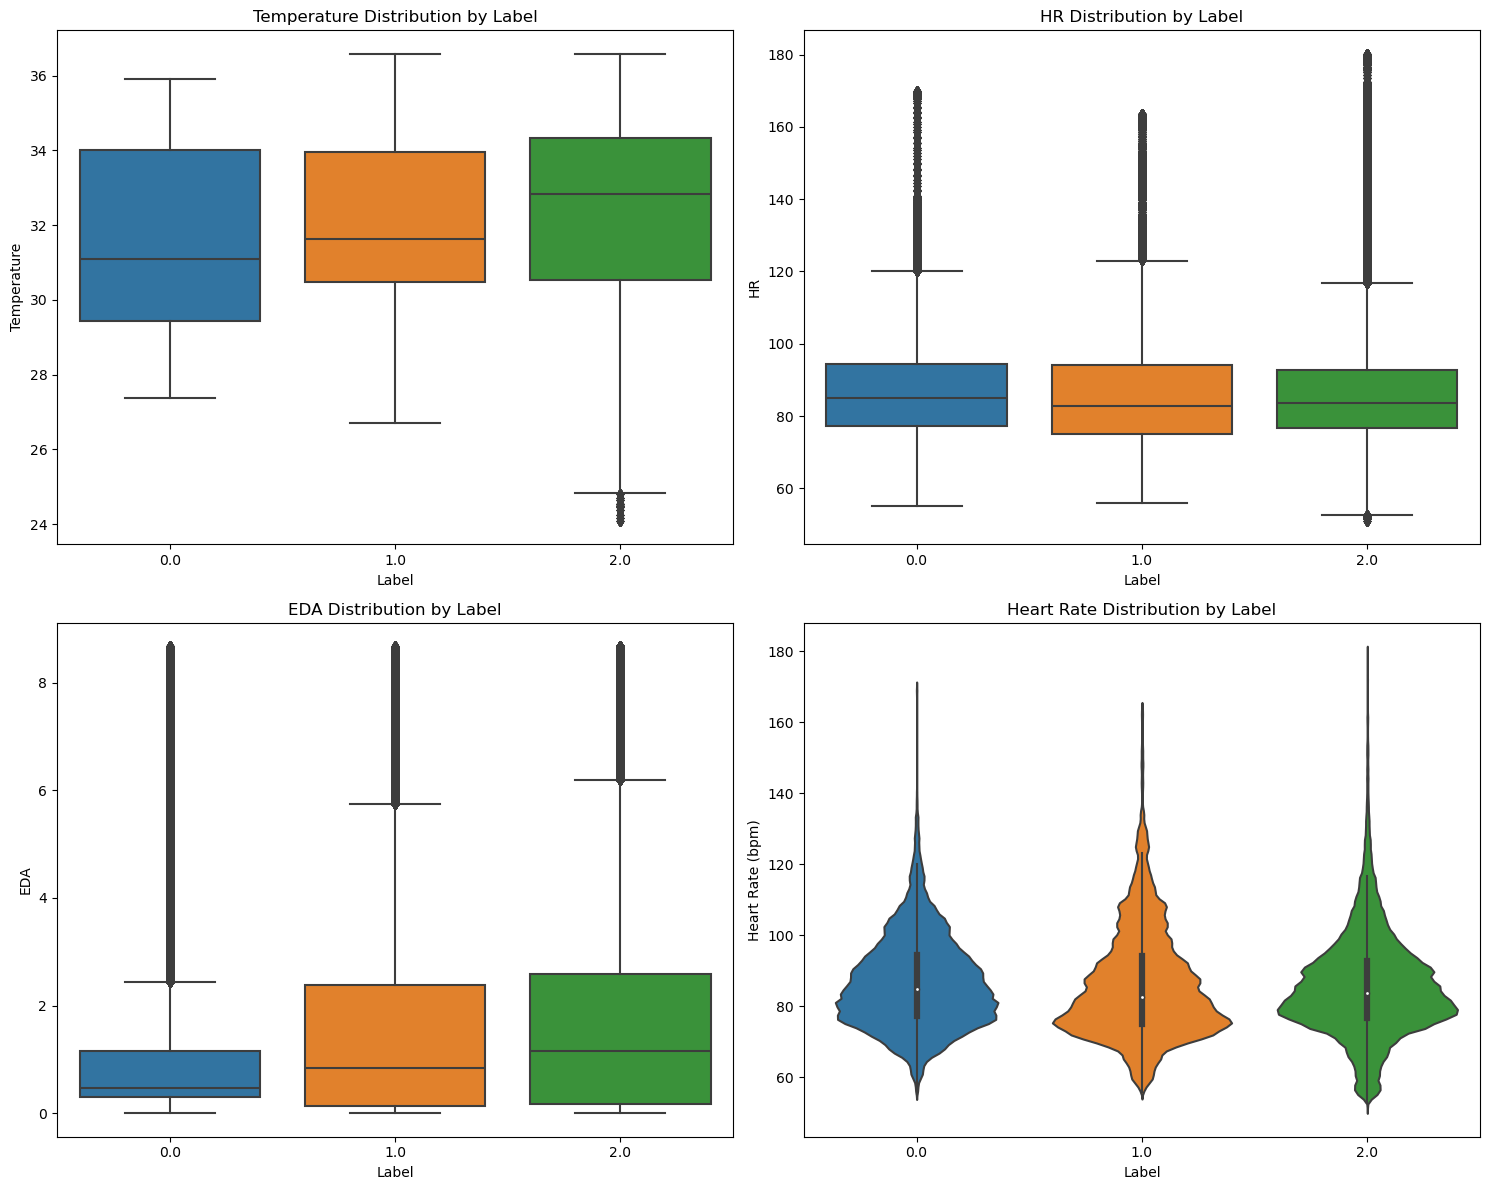

In [21]:
class FeatureVisualizer:
    def __init__(self, data):
        self.data = data

    def plot_boxplot(self, x, y, title, xlabel, ylabel, ax):
        sns.boxplot(x=x, y=y, data=self.data, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    def plot_violinplot(self, x, y, title, xlabel, ylabel, ax):
        sns.violinplot(x=x, y=y, data=self.data, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    def plot_all(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot boxplots
        self.plot_boxplot(x='label', y='TEMP', title='Temperature Distribution by Label', xlabel='Label', ylabel='Temperature', ax=axes[0, 0])
        self.plot_boxplot(x='label', y='HR', title='HR Distribution by Label', xlabel='Label', ylabel='HR', ax=axes[0, 1])
        self.plot_boxplot(x='label', y='EDA', title='EDA Distribution by Label', xlabel='Label', ylabel='EDA', ax=axes[1, 0])
        
        # Plot violinplot
        self.plot_violinplot(x='label', y='HR', title='Heart Rate Distribution by Label', xlabel='Label', ylabel='Heart Rate (bpm)', ax=axes[1, 1])
        
        plt.tight_layout()
        plt.show()

visualizer = FeatureVisualizer(data)
visualizer.plot_all()


In [22]:
# Calculate the Pearson correlation coefficient between features
data = data.replace([np.inf, -np.inf], np.nan).dropna()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()
print(correlation_matrix)

              X         Y         Z       EDA        HR      TEMP     label
X      1.000000  0.061378  0.197679 -0.129872  0.128854  0.026448 -0.009016
Y      0.061378  1.000000  0.019268 -0.046627 -0.066294 -0.079620 -0.024973
Z      0.197679  0.019268  1.000000 -0.100985 -0.104408 -0.031794 -0.058929
EDA   -0.129872 -0.046627 -0.100985  1.000000  0.129322  0.438951  0.120275
HR     0.128854 -0.066294 -0.104408  0.129322  1.000000  0.156965 -0.030715
TEMP   0.026448 -0.079620 -0.031794  0.438951  0.156965  1.000000  0.138786
label -0.009016 -0.024973 -0.058929  0.120275 -0.030715  0.138786  1.000000


In [42]:
import plotly.figure_factory as ff

# Create a heatmap using Plotly with a recognized color scale
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='PuBu',  
    showscale=True,
    zmin=-1,
    zmax=1
)

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_nticks=36,
    width=800,
    height=800
)

fig.show()


In [43]:
# ANOVA test
import scipy.stats as stats

anova_HR = stats.f_oneway(data[data['label'] == 0]['HR'],
                              data[data['label'] == 1]['HR'],
                              data[data['label'] == 2]['HR'])

print(f"ANOVA test result: F = {anova_HR.statistic}, p = {anova_HR.pvalue}")
if anova_HR.pvalue < 0.05:
    print("There is a significant difference in heart rate across the labels.")
else:
    print("There is no significant difference in heart rate across the labels.")

ANOVA test result: F = 5385.4868391642885, p = 0.0
There is a significant difference in heart rate across the labels.


In [44]:
anova_EDA = stats.f_oneway(data[data['label'] == 0]['EDA'],
                              data[data['label'] == 1]['EDA'],
                              data[data['label'] == 2]['EDA'])

print(f"ANOVA test result: F = {anova_EDA.statistic}, p = {anova_EDA.pvalue}")
if anova_EDA.pvalue < 0.05:
    print("There is a significant difference in EDA across the labels.")
else:
    print("There is no significant difference in EDA across the labels.")

ANOVA test result: F = 84019.48932441833, p = 0.0
There is a significant difference in EDA across the labels.


In [45]:
anova_TEMP = stats.f_oneway(data[data['label'] == 0]['TEMP'],
                              data[data['label'] == 1]['TEMP'],
                              data[data['label'] == 2]['TEMP'])

print(f"ANOVA test result: F = {anova_TEMP.statistic}, p = {anova_TEMP.pvalue}")
if anova_TEMP.pvalue < 0.05:
    print("There is a significant difference in TEMP across the labels.")
else:
    print("There is no significant difference in TEMP across the labels.")

ANOVA test result: F = 112025.77009291493, p = 0.0
There is a significant difference in TEMP across the labels.


## Feature Engineering

In [46]:
#standardization & normalization


from sklearn.preprocessing import StandardScaler

features_1 = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']

scaler = StandardScaler()

data[features_1] = scaler.fit_transform(data[features_1])

data.head(5)

,X,Y,Z,EDA,HR,TEMP,datetime,label,year,month,day,hour,minute,second
0,0.486794,-1.799286,-0.634187,2.626008,0.960611,-0.477628,2020-07-08 14:03:00.000000000,2.0,2020,7,8,14,3,0
1,0.263960,-2.039581,-0.902006,2.626008,0.960611,-0.477628,2020-07-08 14:03:00.031249920,2.0,2020,7,8,14,3,0
2,-0.086207,-2.309914,-1.303733,2.626008,0.960611,-0.477628,2020-07-08 14:03:00.062500096,2.0,2020,7,8,14,3,0
3,-0.595541,-1.919434,-2.073711,2.626008,0.960611,-0.477628,2020-07-08 14:03:00.093750016,2.0,2020,7,8,14,3,0
4,-1.232208,-1.679138,-2.575870,2.626008,0.960611,-0.477628,2020-07-08 14:03:00.124999936,2.0,2020,7,8,14,3,0


In [47]:
data.drop(["datetime"], axis=1).corr()

,X,Y,Z,EDA,HR,TEMP,label,year,month,day,hour,minute,second
X,1.000000,0.061378,0.197679,-0.129872,0.128854,0.026448,-0.009016,NaN,0.119914,-0.151209,0.103485,-0.007251,0.000805
Y,0.061378,1.000000,0.019268,-0.046627,-0.066294,-0.079620,-0.024973,NaN,-0.073949,0.051225,0.152310,-0.035591,-0.002863
Z,0.197679,0.019268,1.000000,-0.100985,-0.104408,-0.031794,-0.058929,NaN,-0.047601,-0.029365,0.067984,0.021446,0.001843
EDA,-0.129872,-0.046627,-0.100985,1.000000,0.129322,0.438951,0.120275,NaN,-0.058150,0.100780,-0.156836,0.005161,0.001351
HR,0.128854,-0.066294,-0.104408,0.129322,1.000000,0.156965,-0.030715,NaN,0.031191,0.084767,-0.055244,-0.005187,-0.002012
TEMP,0.026448,-0.079620,-0.031794,0.438951,0.156965,1.000000,0.138786,NaN,0.184846,-0.114935,-0.248080,-0.002608,-0.000081
label,-0.009016,-0.024973,-0.058929,0.120275,-0.030715,0.138786,1.000000,NaN,0.149444,-0.075774,-0.261795,-0.021705,-0.000268
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.119914,-0.073949,-0.047601,-0.058150,0.031191,0.184846,0.149444,NaN,1.000000,-0.453226,-0.599414,-0.006220,-0.000212
day,-0.151209,0.051225,-0.029365,0.100780,0.084767,-0.114935,-0.075774,NaN,-0.453226,1.000000,0.155616,0.034031,0.000237


In [48]:
data['time_of_day'] = data['datetime'].dt.hour + data['datetime'].dt.minute/60 + data['datetime'].dt.second/3600
data.drop(["datetime", "hour", 'year', 'day', 'minute', 'second'], axis=1, inplace=True)
data.head()

,X,Y,Z,EDA,HR,TEMP,label,month,time_of_day
0,0.486794,-1.799286,-0.634187,2.626008,0.960611,-0.477628,2.0,7,14.05
1,0.263960,-2.039581,-0.902006,2.626008,0.960611,-0.477628,2.0,7,14.05
2,-0.086207,-2.309914,-1.303733,2.626008,0.960611,-0.477628,2.0,7,14.05
3,-0.595541,-1.919434,-2.073711,2.626008,0.960611,-0.477628,2.0,7,14.05
4,-1.232208,-1.679138,-2.575870,2.626008,0.960611,-0.477628,2.0,7,14.05


##### EDA and TEMP are moderately correlated with Label

In [49]:
from sklearn.feature_selection import VarianceThreshold

X = data.iloc[:, list(range(0, 6))]
selector = VarianceThreshold(threshold=0.0)
X_selected = selector.fit_transform(X)
print("The number of selected features:", X_selected.shape[1])
print(X_selected.shape)

The number of selected features: 6
(11403445, 6)


In [51]:
#PCA
from sklearn.decomposition import PCA

X = data.iloc[:, list(range(0, 6))]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

np.set_printoptions(suppress=True, precision=4)

print("Number of features after dimensionality reduction:", X_pca.shape[1])
print(X_pca)

Number of features after dimensionality reduction: 5
[[ 2.1331  0.1242  0.9651 -0.8811  0.0698]
 [ 2.2829 -0.1935  1.1599 -0.9975  0.1248]
 [ 2.4924 -0.6761  1.411  -1.0961  0.1851]
 ...
 [ 1.1966  0.2179  0.001  -0.9215  0.0842]
 [ 1.1425  0.2418 -0.1246 -0.7719 -0.0013]
 [ 1.0789  0.3988 -0.1412 -0.6066  0.1206]]


# Model

In [56]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Naive Bayes

In [64]:
selected_features = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'month', 'time_of_day']
X = data[selected_features]
y = data['label']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7000647611313949
Classification Report:
               precision    recall  f1-score   support

         0.0       0.37      0.44      0.40    432579
         1.0       0.34      0.14      0.20    154433
         2.0       0.81      0.82      0.81   1693677

    accuracy                           0.70   2280689
   macro avg       0.51      0.47      0.47   2280689
weighted avg       0.70      0.70      0.69   2280689



### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_features = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'month', 'time_of_day']
X = data[selected_features]
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Model Accuracy: 0.9999394919693128
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    432579
         1.0       1.00      1.00      1.00    154433
         2.0       1.00      1.00      1.00   1693677

    accuracy                           1.00   2280689
   macro avg       1.00      1.00      1.00   2280689
weighted avg       1.00      1.00      1.00   2280689



### Random Forest

In [66]:
selected_features = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'month', 'time_of_day']
X = data[selected_features]
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

subset_size = 0.01
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1-subset_size, random_state=42)

rf = RandomForestClassifier(n_estimators=10, random_state=42)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

params = {
    'max_depth': [None, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}


grid_search = GridSearchCV(rf, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_subset, y_subset)

best_params = grid_search.best_params_
best_params['n_estimators'] = 50

rf_best_subset = RandomForestClassifier(**best_params, random_state=42)
rf_best_subset.fit(X_subset, y_subset)

y_pred_subset = rf_best_subset.predict(X_test)

print("Subset Training Results:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred_subset))
print("Classification Report:\n", classification_report(y_test, y_pred_subset))

In [ ]:
rf_best_full = RandomForestClassifier(**best_params, random_state=42)
rf_best_full.fit(X_train, y_train)

y_pred_full = rf_best_full.predict(X_test)

print("Full Dataset Training Results:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred_full))
print("Classification Report:\n", classification_report(y_test, y_pred_full))

### #XGboost&lightgbm

In [ ]:
selected_features = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'month', 'time_of_day']
X = data[selected_features]
y = data['label']

y = np.where(y == 2, 1, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lgb = LGBMClassifier(objective='binary', random_state=42, is_unbalance=True)
xgb = XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight=sum(y_train == 0) / sum(y_train == 1))

lgb_params = {
    'learning_rate': [0.1],
    'n_estimators': [50],
    'max_depth': [3],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

xgb_params = {
    'learning_rate': [0.1],
    'n_estimators': [50],
    'max_depth': [3],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

lgb_grid = GridSearchCV(lgb, lgb_params, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=cv, scoring='f1', n_jobs=-1, verbose=1)

lgb_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

y_pred_lgb = lgb_grid.best_estimator_.predict(X_test)
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)

print("LightGBM:")
print("Best parameters: ", lgb_grid.best_params_)
print("Accuracy: ", accuracy_score(y_test, y_pred_lgb))
print("Precision: ", precision_score(y_test, y_pred_lgb))
print("Recall: ", recall_score(y_test, y_pred_lgb))
print("F1: ", f1_score(y_test, y_pred_lgb))

print("XGBoost:")
print("Best parameters: ", xgb_grid.best_params_)
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Precision: ", precision_score(y_test, y_pred_xgb))
print("Recall: ", recall_score(y_test, y_pred_xgb))
print("F1: ", f1_score(y_test, y_pred_xgb))

### Long-short term Model

In [ ]:
class AccuracyThresholdCallback(Callback):
    def __init__(self, threshold=0.9995):
        super(AccuracyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get('val_accuracy')
        if val_acc >= self.threshold:
            self.model.stop_training = True


features = data[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'month', 'time_of_day']].values
target = data['label'].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

target_categorical = to_categorical(target)


X_train, X_test, y_train, y_test = train_test_split(scaled_features, target_categorical, test_size=0.2, random_state=42)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))  # Reduced number of units
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
model.summary()

# Create an instance of the custom callback
accuracy_threshold_callback = AccuracyThresholdCallback(threshold=0.9995)

# Fit the model with reduced epochs and increased batch size
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test),
                    callbacks=[accuracy_threshold_callback], verbose=2, shuffle=False)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))